# Predicting heart disease using machine learning model

In [87]:
# Importing all the tools that are required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv") # Reading the csv file where we have our dataset

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

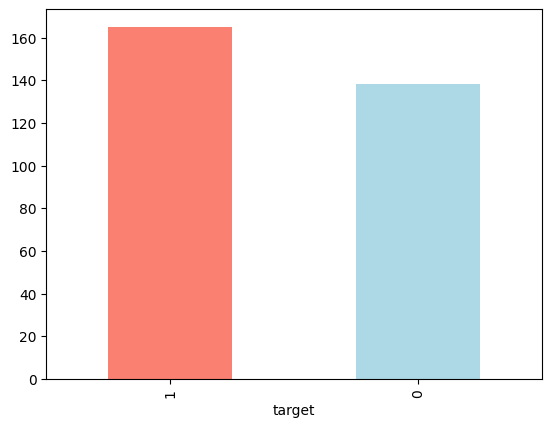

In [5]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


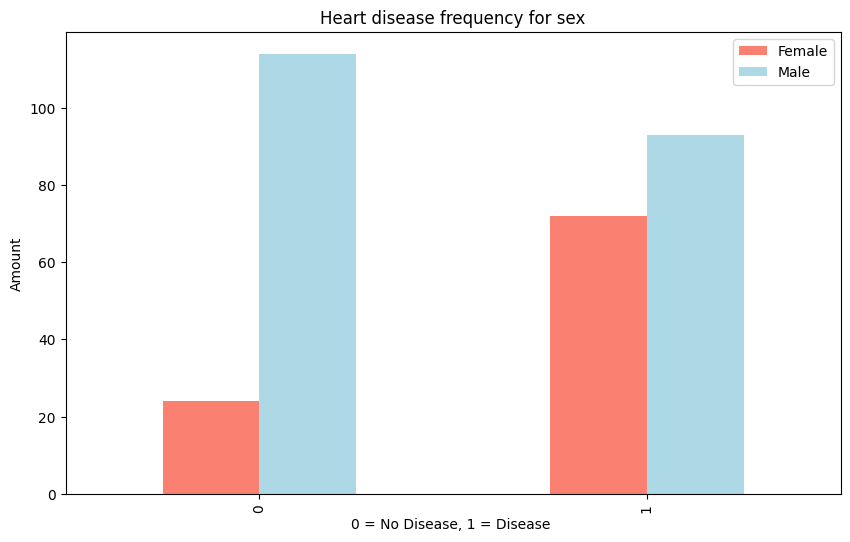

In [8]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize = (10,6), color=["salmon", "lightblue"]);
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease ")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

## Age VS Max Heart rate for Heart Disease

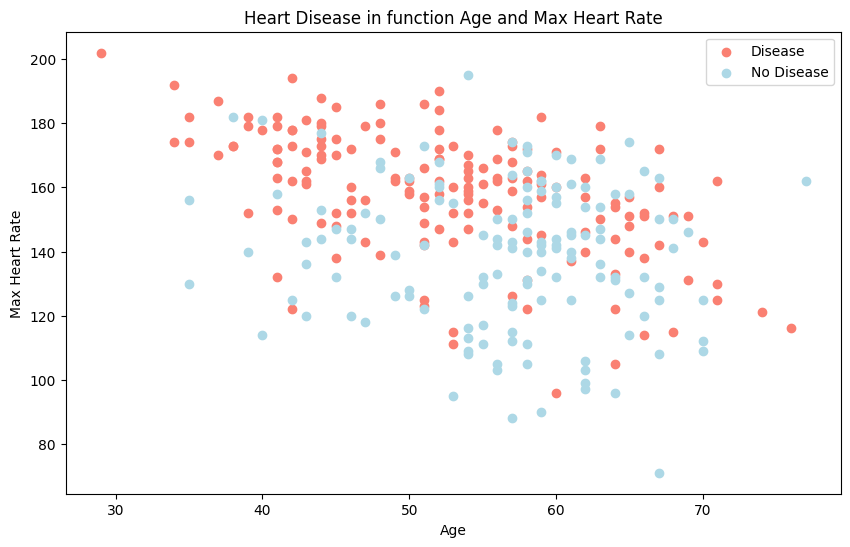

In [9]:
plt.figure(figsize = (10,6))

# Plotting the Positive patients who has heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")
# Plotting the Negative patients who has no heart disease 
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");

# Labeling the data

plt.title("Heart Disease in function Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

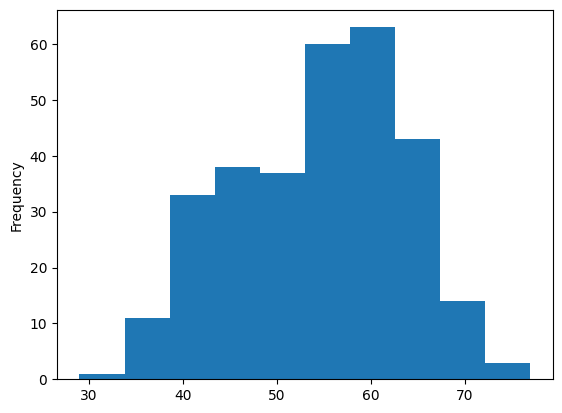

In [10]:
df.age.plot.hist();

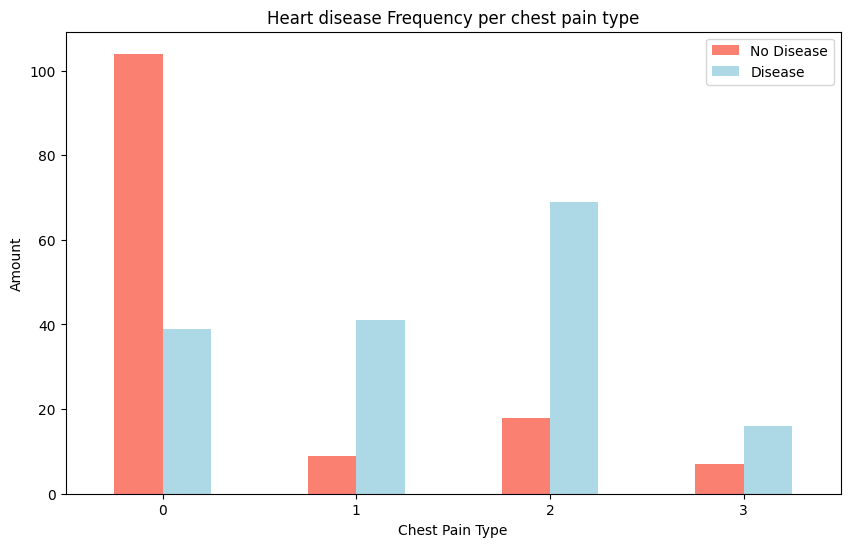

In [11]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);
plt.title("Heart disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [12]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


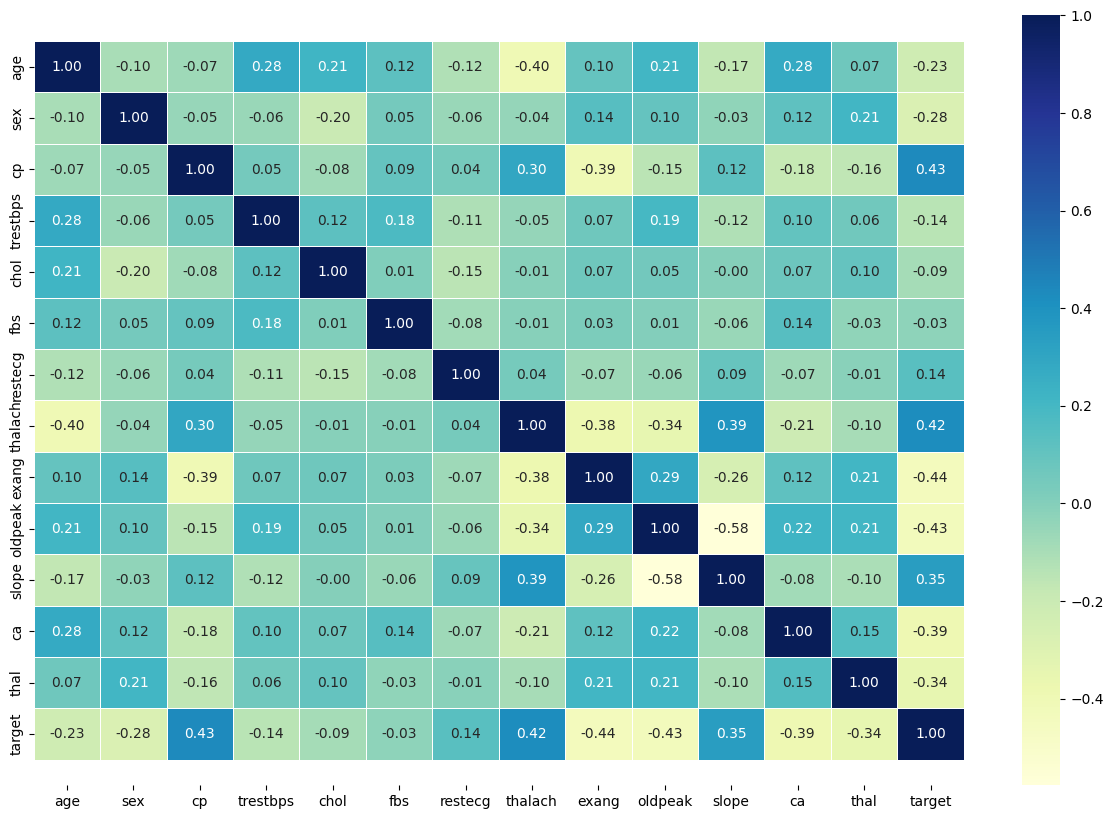

In [13]:
cor = df.corr()
fig, ax=plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [80]:
x = df.drop("target", axis=1)
y = df.target

np.random.seed(42)
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state=42)

In [81]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [84]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
model = {"Logestic": LogisticRegression(), "KNK": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

def fit_and_score(model, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in model.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)
    return model_score

In [86]:
model_score = fit_and_score(model, x_train, x_test, y_train, y_test)
model_score

{'Logestic': 0.78099173553719,
 'KNK': 0.7975206611570248,
 'Random Forest': 0.7892561983471075}

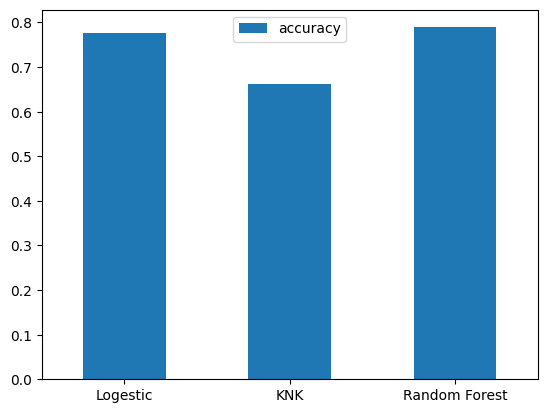

In [18]:
model_compare = pd.DataFrame(model_score, index = ["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

## Improving our model

In [19]:
# Trying different n-neighbors

a = range(1,21)

train_scores = []
test_scores = []

knn = KNeighborsClassifier()

for i in a:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [20]:
train_scores

[1.0,
 0.7540983606557377,
 0.8032786885245902,
 0.7540983606557377,
 0.819672131147541,
 0.7540983606557377,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836]

In [21]:
test_scores

[0.5991735537190083,
 0.6322314049586777,
 0.6157024793388429,
 0.6487603305785123,
 0.6611570247933884,
 0.6652892561983471,
 0.6611570247933884,
 0.6446280991735537,
 0.6115702479338843,
 0.628099173553719,
 0.5867768595041323,
 0.628099173553719,
 0.6033057851239669,
 0.6115702479338843,
 0.6198347107438017,
 0.6074380165289256,
 0.6157024793388429,
 0.6157024793388429,
 0.6115702479338843,
 0.5867768595041323]

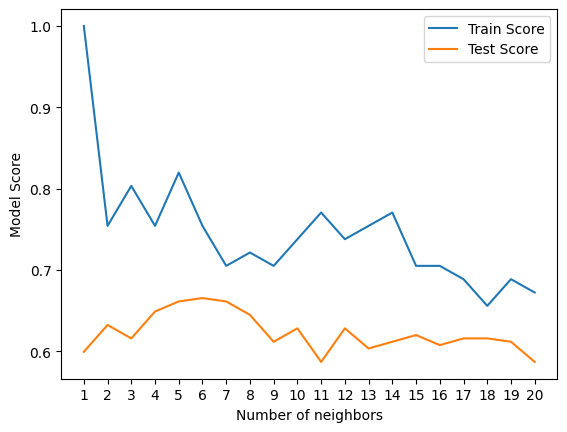

In [22]:
plt.plot(a, train_scores, label="Train Score")
plt.plot(a, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

## Tuning Hyperparameter With RandomizedSearchCV



In [23]:
log_grid = {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
# Tuning LogisticRegression

np.random.seed(42)
rs_log = RandomizedSearchCV(LogisticRegression(), 
                            param_distributions = log_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
rs_log.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log.score(x_test, y_test)

In [26]:
rf_log = RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
rf_log.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
y_preds = rf_log.predict(x_test)

In [28]:
y_preds

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

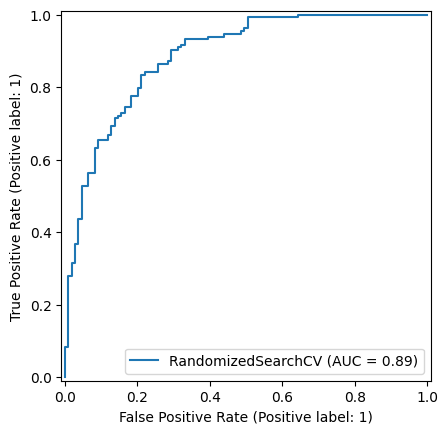

In [30]:
RocCurveDisplay.from_estimator(rf_log, x_test, y_test)

In [33]:
print(confusion_matrix(y_test, y_preds))

[[ 73  36]
 [ 11 122]]


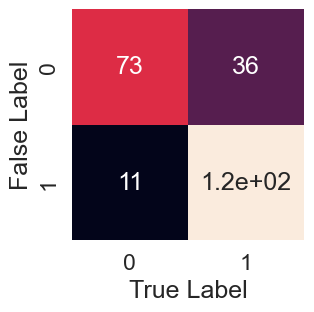

In [43]:
sns.set(font_scale=1.5)
def RocCurveDisplay(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("False Label")

RocCurveDisplay(y_test, y_preds)

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       109
           1       0.77      0.92      0.84       133

    accuracy                           0.81       242
   macro avg       0.82      0.79      0.80       242
weighted avg       0.82      0.81      0.80       242



In [46]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [48]:
clf = LogisticRegression(C=1.623776739188721, solver="liblinear")

In [59]:
# CV accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8215300546448088

In [62]:
#CV precision
cv_pre = cross_val_score(clf, x, y, cv=5, scoring="precision") 
cv_pre = np.mean(cv_pre)
cv_pre

0.817900063251107

In [58]:
#CV recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [61]:
#CV f1-score
cv_f1 = cross_val_score(clf, x, y, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431741323998502

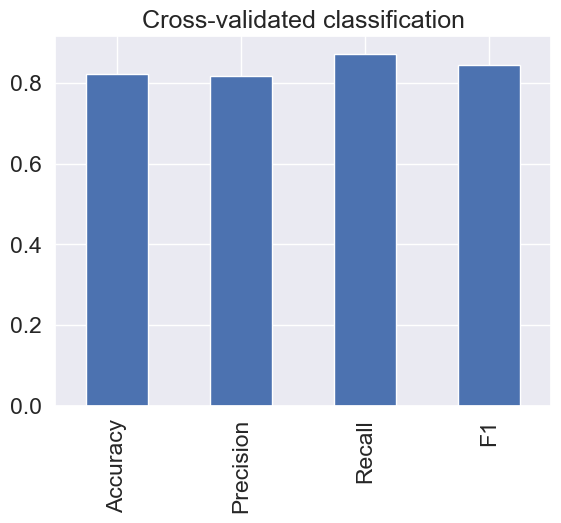

In [70]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_pre, "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification", legend = False);

In [72]:
clf.fit(x_train, y_train)
clf.coef_   # Check coef

array([[ 0.08466338, -1.08726799,  1.26893443, -0.07714337, -0.00892506,
        -0.74809782,  1.04809232,  0.06653335,  0.29279193, -0.26595967,
        -0.51340824, -0.80917376, -0.28653468]])

In [76]:
feat = dict(zip(df.columns, list(clf.coef_[0])))
feat

{'age': 0.08466338297182592,
 'sex': -1.087267990667922,
 'cp': 1.2689344275694445,
 'trestbps': -0.0771433734398324,
 'chol': -0.008925059117026384,
 'fbs': -0.7480978213679594,
 'restecg': 1.0480923189717266,
 'thalach': 0.06653335026367885,
 'exang': 0.2927919334750349,
 'oldpeak': -0.26595967425003186,
 'slope': -0.5134082361314036,
 'ca': -0.8091737619948393,
 'thal': -0.28653467961191964}

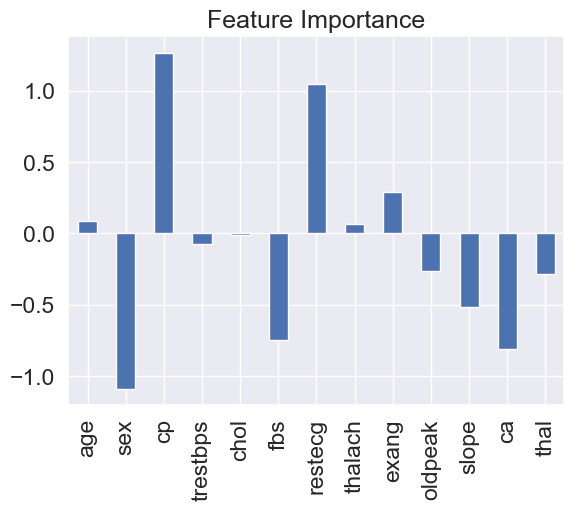

In [79]:
feat_df = pd.DataFrame(feat, index=[0])
feat_df.T.plot.bar(title="Feature Importance", legend=False);